# Sedaro Studies Example Notebook 
Demonstrates Sedaro Studies support via the sedaro python client using a Jupyter notebook.

# Introduction  
This notebook demonstrates how to use the new Studies support added to Sedaro. 
The core of this support is the new API python client object **SimStudy**.
**SimStudy** will generate and run a series of *SimJobs* in parallel up to account capacity limits. The remaining simjobs will be placed in a queue and will be execute when resources are available. 

Each *SimJob* of a **SimStudy** will set the random seed to a different value in order to generate different output results from the simulation.
The **Overrides** feature takes this a step further by providing a means to adjust any starting value of any model of the simulation using a set of pre-defined functions. In other words, each *SimJob* of a **SimStudy** will run a baseline Scenario branch with model parameters variations in order to observe their effects on performance results.

# Setup
Running this notebook requires the following:
- A Sedaro Account            --> https://www.sedaro.com
- A Sedaro API Token          --> https://www.sedaro.com/#/account
- The Wildfire Demo Branch ID --> login --> select/click or create workspace --> select/click Project: [DEMO] WildFire --> select/click  Repositories: [DEMO] Wildfire Scenarios --> copy main branch ID via clipboard icon (TODO insert screen shot)
- Python 3.10+ installed      --> https://www.python.org
- Jupyter notebook or lab     --> https://jupyter.org

## Pip requirements
Create/activate a python venv if desired

In [1]:
#!python -m venv /path/to/new/virtual/environment

Activate it via this table
| Platform | Shell | Command to activate virtual environment |
| :- | :- | :- |
| POSIX | bash/zsh |  source <venv>/bin/activate |
| | fish |  source <venv>/bin/activate.fish |
| | csh/tcsh |  source <venv>/bin/activate.csh |
| | PowerShell |  <venv>/bin/Activate.ps1 |
| Windows | cmd.exe | C:\> <venv>\Scripts\activate.bat |
| | PowerShell | PS C:\> <venv>\Scripts\Activate.ps1 |

Required python modules:
> replace *python* with *python3* if needed 

In [2]:
#!python -m pip install -e sedaro pytest matplotlib pandas sweetviz

or

In [3]:
#!python3.10 -m pip install  sedaro pytest matplotlib pandas sweetviz

In [4]:
#!python3.10 -m pip install sweetviz IProgress

Run the following cells to test if all required python modules are installed correctly

Optional module needed by the stats() function if desired 

In [1]:
import sedaro
import yaml
import json
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [2]:
# optional
import sweetviz as sv

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Important: Read Before Running

This notebook makes changes to agent and scenario branches indicated in the settings section. Ensure any changes to the target branches are saved prior to running this code. Sedaro recommends committing current changes and creating new branches in the target repositories to avoid loss of work.

This notebook also requires that you have previously generated an API key in the web UI. That key should be stored in a file called `secrets.json` in the same directory as this notebook with the following format:

```json
{
    "API_KEY": "<API_KEY>"
}
```

API keys grant full access to your repositories and should never be shared. If you think your API key has been compromised, you can revoke it in the user settings interface on the Sedaro website.



## Sedaro python client setup
Note: More information about the sedaro-python client can be found here: [https://github.com/sedaro/sedaro-python]


In the next cell, adjust the following variables as needed
- *Sedaro_api_host*
- *Sedaro_api_token*

In [3]:
Sedaro_api_host  = "http://localhost:80" # "api.sedaro.com"

# Set your API token value either directly or via loading a secrets file
# !! NOTE !!  Be careful not to check in your API Key into a source control repo  !! Note !!
secretPath = '/Users/sedaro/Documents/sedaro/sedaro-satellite/secrets.json'
with open(secretPath, 'r') as file:
    Sedaro_api_token = json.load(file)['API_KEY']
    
sedaroAPI = sedaro.SedaroApiClient(api_key=Sedaro_api_token, host=Sedaro_api_host)

## Load the wildfire scenario branch data
Change the value of the *scenario_branch_id* in the next cell to the branch id noted above during the **Setup** section.
then run the following cell:

In [4]:
scenario_branch_id = "PKgBt4JWCmLVFBBzQBK3d8"
wildfire_scenario_branch = sedaroAPI.scenario(scenario_branch_id)

# Overview of the Study objects
Studies consist of a set of scenarios, which contain a set of Agents, which contain a number of physic-based Models.

Studies can adjust the starting values of scenario Agent Model parameters in order to observe the change effect on the overall performance metrics. 

Studies provide various methods of changing Agent model parameters which include:  Basic Math, Distribution based random values, tradespace tables, etc. 

Each modified scenario is run as a SimulationJob where the random seed of the simulation job are set to be different from each other.

These simulation jobs can be run in parallel up to a given **capacity** argument up to account resource limits.

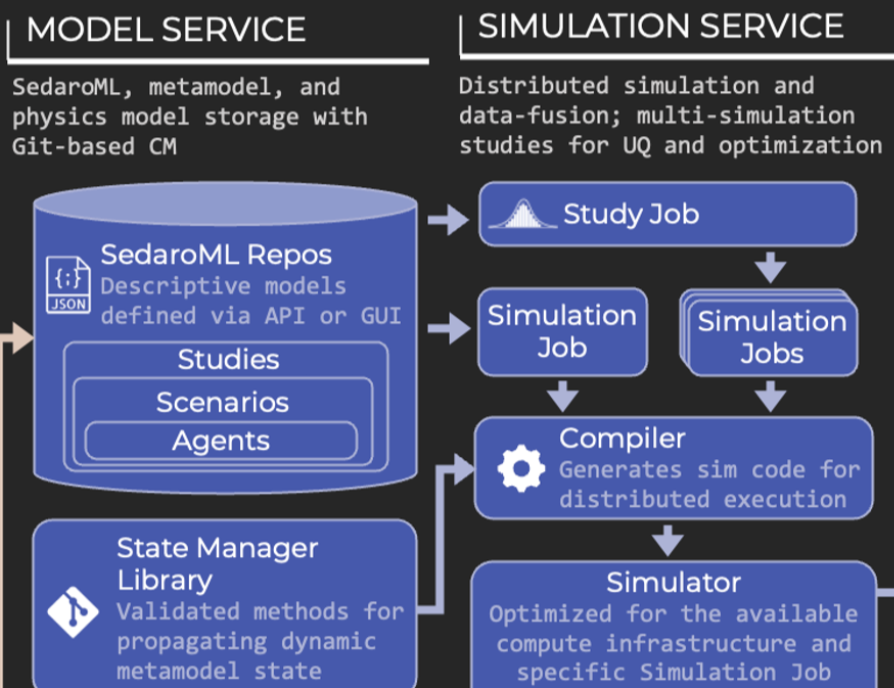

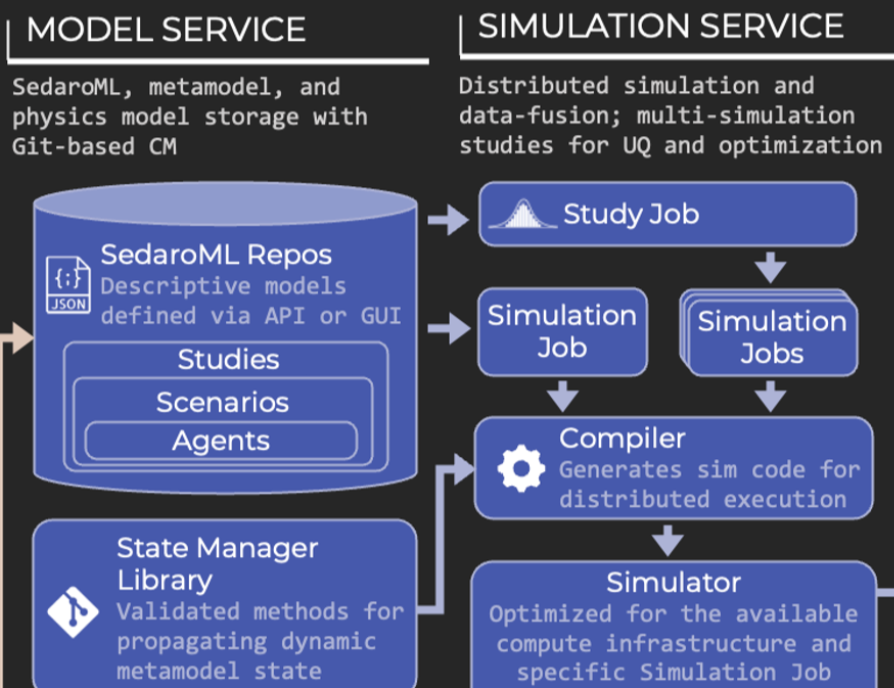


Results of the Studies SimulationJobs can be easily loaded into jupyter notebooks with helper functions for model parameter plotting and statistical analysed 

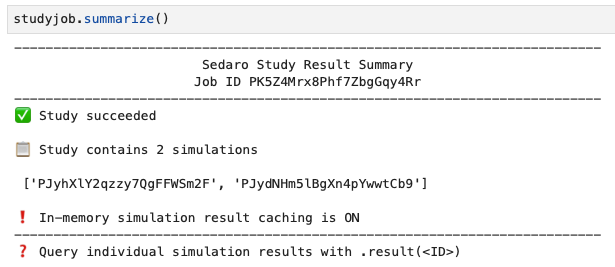

Statistics for individual Models  

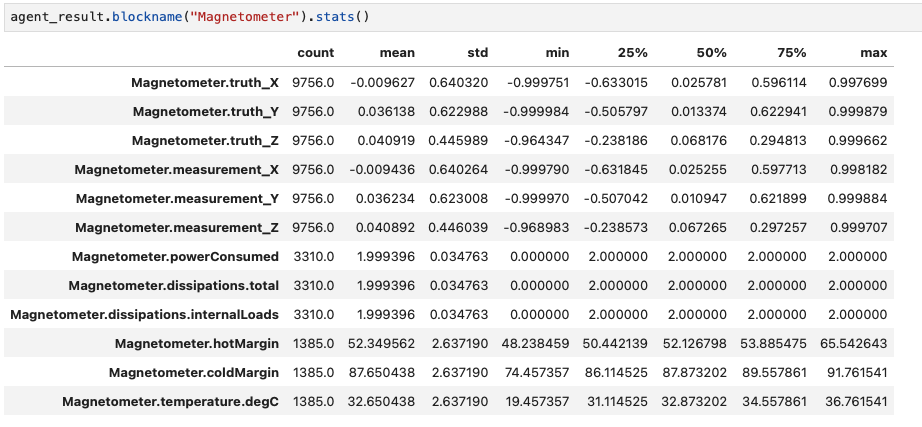

Model parameter histograms are available

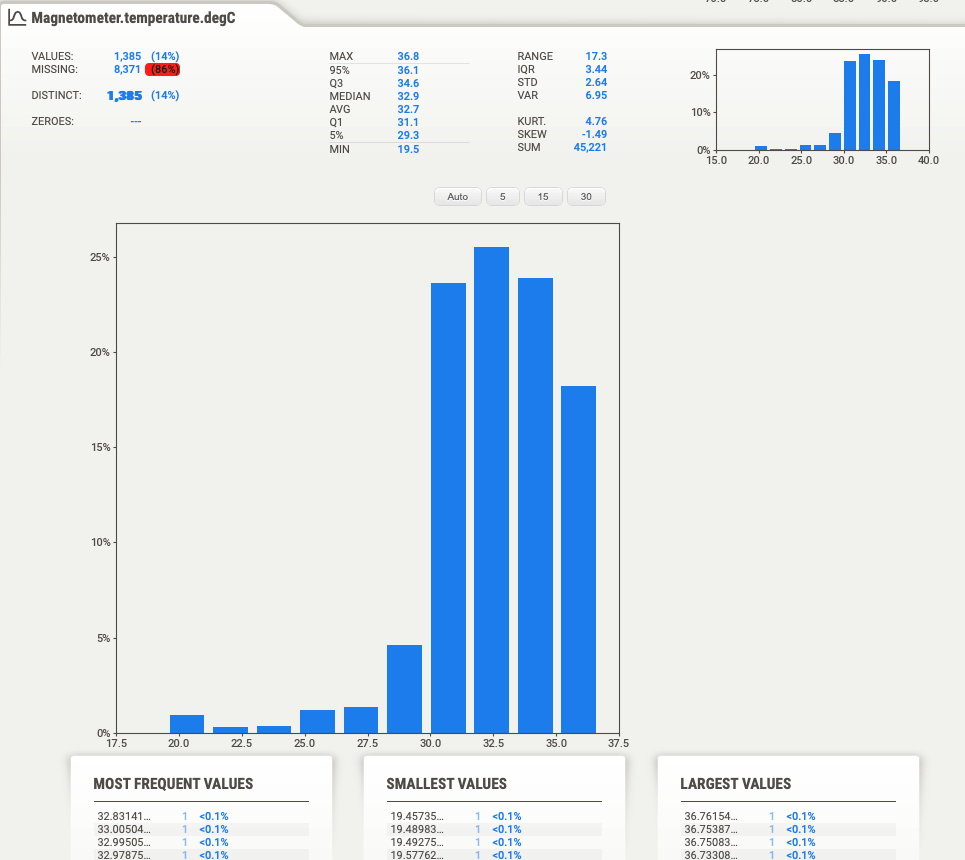

Along with Model scatter plots

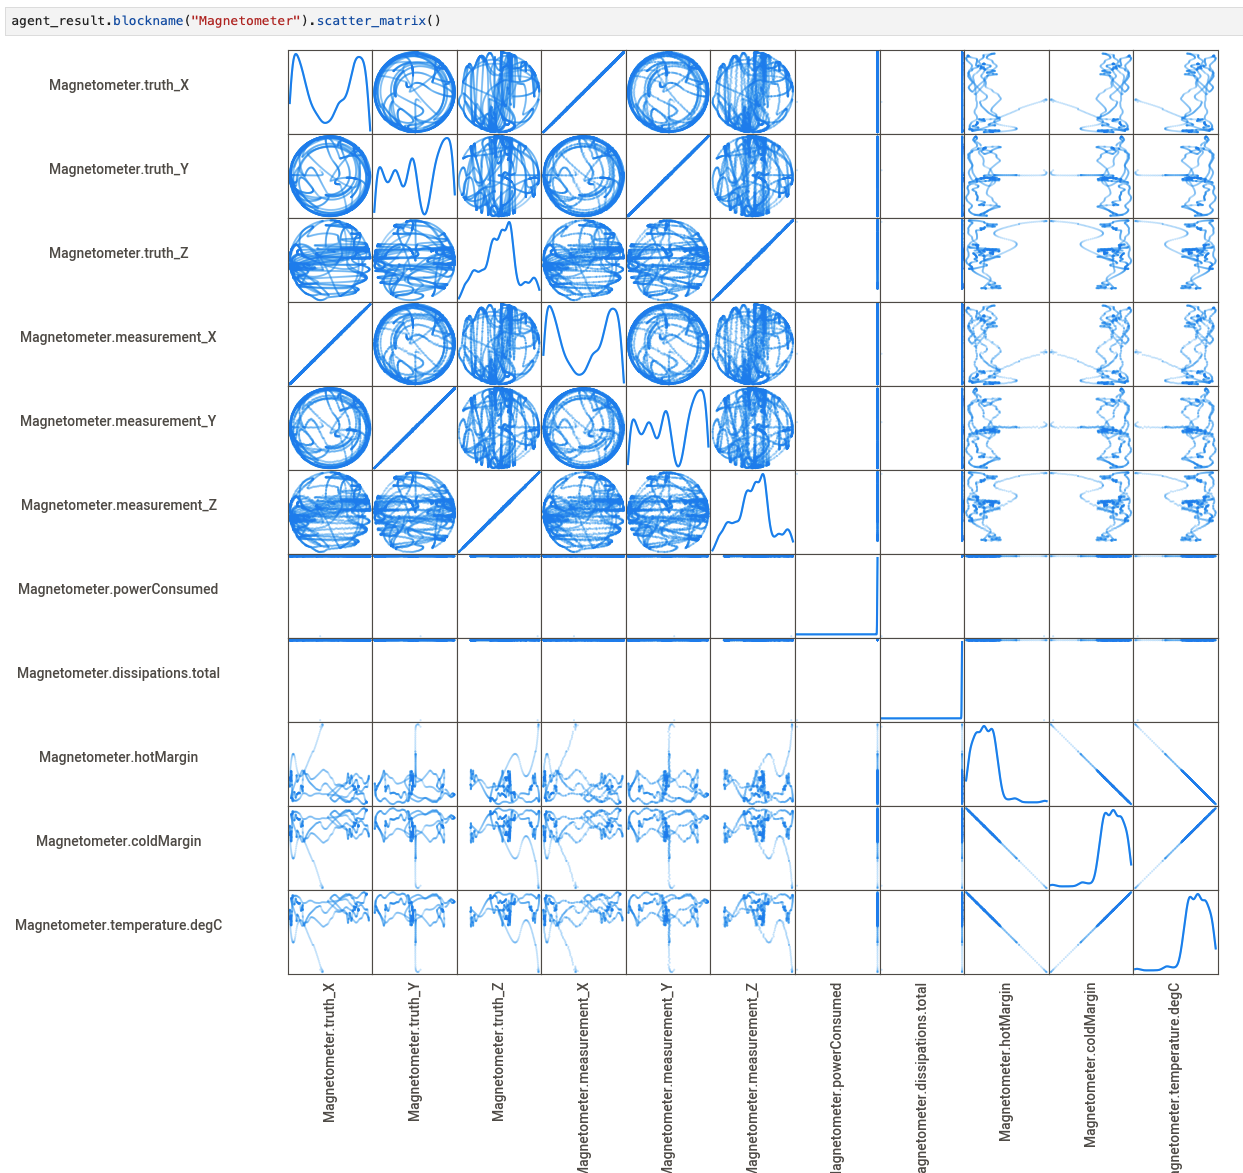

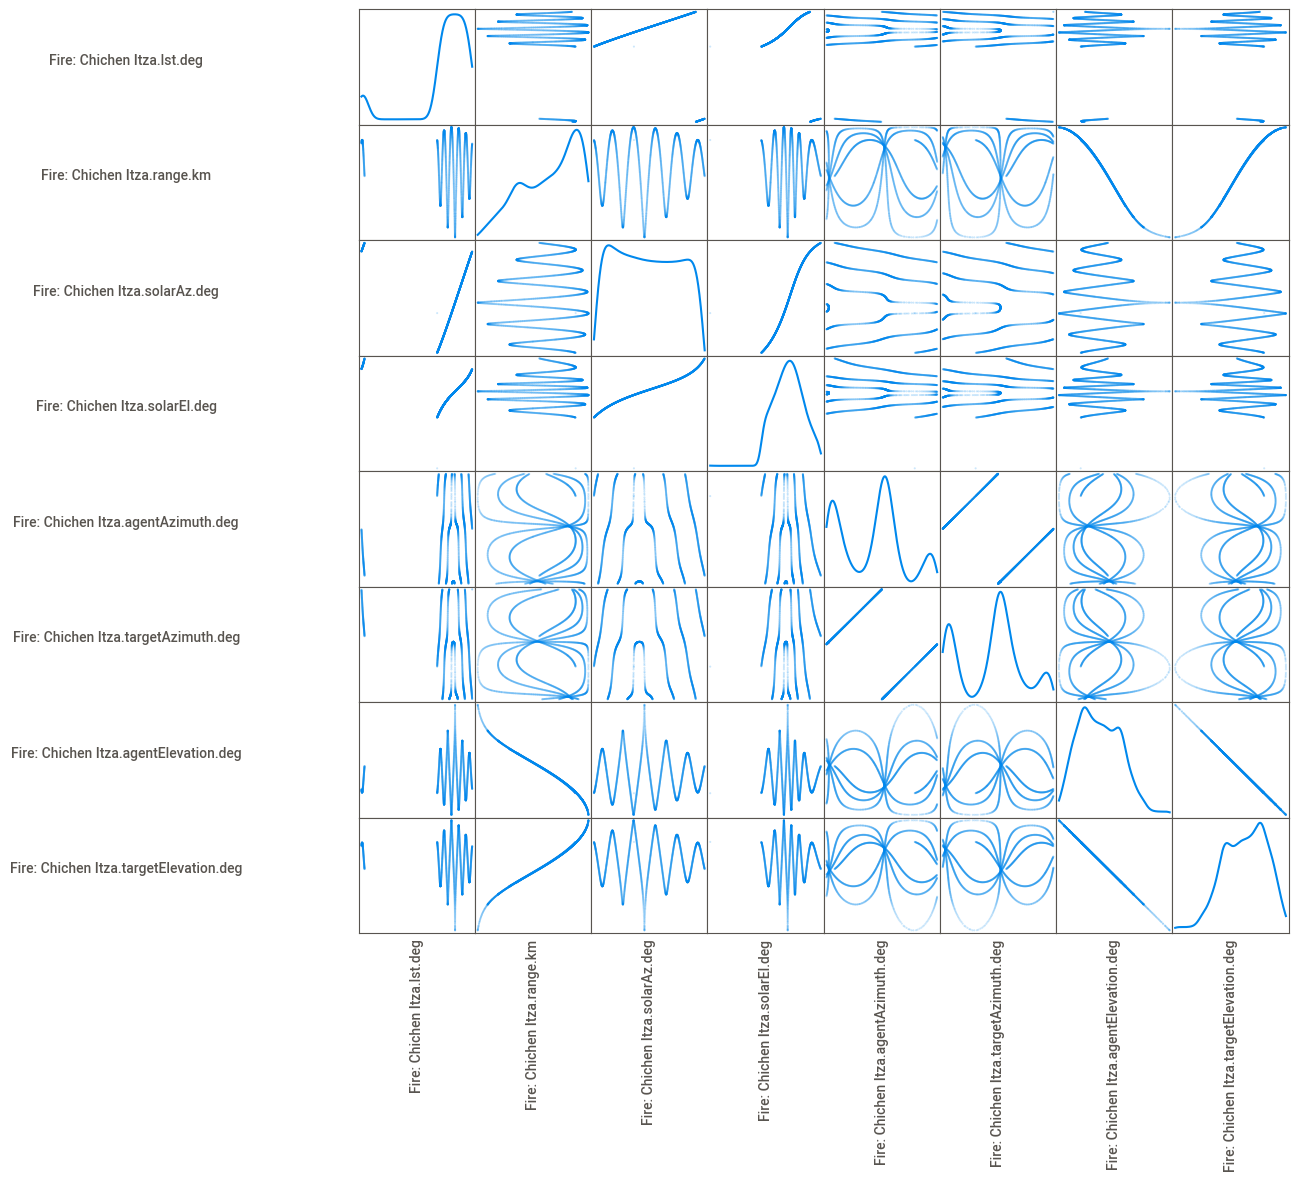

All existing Study objects of a scenario_branch can be listed via runnng the following cell:  

In [5]:
resource = f'/simulations/branches/{scenario_branch_id}/control/study/'
sedaroAPI.request.get(resource)

[{'branch': 'PKgBt4JWCmLVFBBzQBK3d8',
  'dateCreated': '2023-12-04T20:21:03.901Z',
  'dateModified': '2023-12-04T20:45:36.281Z',
  'id': 'PKjwzmW99mRrRm4cmQGr7m',
  'jobType': 'STUDY',
  'jobs': ['PKjwzrMWQv3Sm6mYKThbtK',
   'PKhJQ76WN3HvyN4JXjl4Kw',
   'PKhGtfzBcvLh6qPtdBylJ5',
   'PKgkfrXdHLYRslCZkvSy9m'],
  'message': 'Started study successfully.',
  'predecessor': None,
  'scenarioHash': 'c5f44bbf7ed3d88f81d398a367b364afe863a32fc49aad37d30f279ae51a24bd',
  'status': 'SUCCEEDED',
  'successors': [],
  'workspace': 'PKgBsyk48JVMJcL59yvcWM'},
 {'branch': 'PKgBt4JWCmLVFBBzQBK3d8',
  'dateCreated': '2023-12-01T15:46:00.571Z',
  'dateModified': '2023-12-04T18:08:39.992Z',
  'id': 'PKhCd5q3KSC46F74qgkjkt',
  'jobType': 'STUDY',
  'jobs': ['PKhCdD2mNJhjQkhjS7lsSr',
   'PKhCdBwfhYgQ5wzzRXDdYk',
   'PKhCd8pXSzkVgksQXQDfmS'],
  'message': 'Something went wrong. Please try again in a few minutes, or contact our support team at support@sedarotech.com if this issue persists.',
  'predecessor': N

but if this is the first time running this notebook then a empty list **[]** will  be returned.

## Study
Created via the sedaro-python REST post method   
```
resource = f'/simulations/branches/{scenario_branch_id}/control/study/'
result = sedaroAPI.request.post(resource,
       body={
            "iterations": 3,    # must be greater than one up to MAX_STUDY_ITERATIONS (currently 250)
            "overrideId": "ID", # <optional>
            "capacity": int,    # <optional>
            })
```
where the body can have the following options:
- **iterations**: positive int
 - number of times to run the selected branch scenario. Each time a different random seed will be used. 
 - sets a special variable "sim_index" for each simulation run starting at zero and is incremented by one
    - aka an index from  0 to (iterations - 1) for each simulation run.
- **capacity**: positive int. 
 - Used to limit the number of concurrent study simulation runs. 
- **overrideId**: string.  
 - Loads a set of defined override commands that will be applied before each simulation of the study is run. Starting model parameters changed by override commands are saved as a snapshot.


In [ ]:
#TODO Replace above with new create method

# Appendix: Class methods for the scenario_branch.study Class, along with it's support classes

## Study Class
| Class Method | Arguments  | Returns | Description |
| :-: | :-: | :-: | :- | 
| start | ( iterations: int ) | StudyHandle | Starts study corresponding to the respective Sedaro Scenario Branch id. |
| status | ( job_id: str = None ) | StudyHandle |  Refreshes the local study status. |
| terminate | ( job_id: str = None ) | StudyHandle | Terminate latest running simulation job corresponding to the respective Sedaro Scenario Branch id. |
|  |  |  | If a `job_id` is provided, that simulation job will be terminated rather than the latest. |
| |
| results | (job_id: str = None) | StudyResult | Query latest scenario study result. If a `job_id` is passed, query for corresponding sim results rather than latest. |
| results_poll | ( job_id: str = None, retry_interval: int = 2) | StudyResult | Query latest scenario study result and wait for sim to finish if it's running. | 
| | | | If a `job_id` is passed, query for corresponding study results rather than latest. See `results` method for details on using the `streams` kwarg. |
| |
| stats_results | () | StudyStatsResult | Retuens a 'StudyStatsResult' instance of Statistics based on the study result data |

---

## StudyHandle
By default, this class will lazily load simulation results as requested
and cache them in-memory. Different caching options can be enabled with
the .set_cache method.

| Class Method | Arguments  | Returns | Description |
| :-: | :-: | :-: | :- | 
| get | (key, default=None) | StudyHandle | Returns a Study handle with the given key |
| status | (err_if_empty: bool = True) | StudyHandle | Refreshes the local study status. |
| terminate | () | StudyHandle | Terminate the running study. |
| |
| results | () | StudyResults | Query study results. |
| results_poll | (retry_interval: int = 2) | StudyResults | Query study results but wait for sim to finish if it's running. See `results` method for details on using the `streams` kwarg. |
| |
| stats_results | () | StudyStatsResult | Returns a StudyStatResult object |

---

## StudyResult
| Class Method | Arguments  | Returns | Description |
| :-: | :-: | :-: | :- | 
| id | () | int | Returns the id of the StudyResult Object |
| branch | () | str | Returns the branch id of the StudyResult Object |
| scenario_hash | () | str | Returns a unique hash |
| status | () | str | xx |
| date_created | () | datetime | xx |
| date_modified | () | datetime | xx |
| job_ids | () | List[int] | Returns a list of SimJob id's created by the Study.start method |
| iterations | () | int | Returns the number of SimJobs created by the Study.start method |
| set_cache | (cache: bool = True, cache_dir: str = None) | None | Set caching options for this study result. |
| | | | cache: Boolean option to turn caching on or off. |
| | | | cache_dir: Path to a directory for on-disk caching. |
| result | (id_: str, streams: Optional[List[Tuple[str, ...]]] = None) | SimulationResult | Query results for a particular simulation. |
| clear_cache | () | None | Clears the cache files in the cache_dir |
| summarize | () | None | Summarize these results in the console.' |

---

## StudyStatsResult                                                                                                        
| Class Method | Arguments  | Returns | Description |
| :-: | :-: | :-: | :- | 
| id | () | int | Returns the id of the StudyResult Object |
| branch | () | str | Returns the branch id of the StudyResult Object |
| scenario_hash | () | str | Returns a unique hash |
| status | () | str | xx |
| date_created | () | datetime | xx |
| date_modified | () | datetime | xx |
| job_ids | () | List[int] | Returns a list of SimJob id's created by the Study.start method |
| iterations | () | int | Returns the number of SimJobs created by the Study.start method |
| set_cache | (cache: bool = True, cache_dir: str = None) | None | Set caching options for this study result. |
| | | | cache: Boolean option to turn caching on or off. |
| | | | cache_dir: Path to a directory for on-disk caching. |
| result | (id_: str, streams: Optional[List[Tuple[str, ...]]] = None) | SimulationResult | Query results for a particular simulation. |
| clear_cache | () | None | Clears the cache files in the cache_dir |
| summarize | () | None | Summarize these results in the console.' |
| stats_results | (_ids=None ) | dict[simjob_id, pandas.dataframe] | Packages the sim results into a dictory of simjob_id to sim results as a pandas dataframe |
| xx | xx | xx | xx |
| xx | xx | xx | xx |
| xx | xx | xx | xx |